In [3]:
# Import modules
import osmnx as ox 

import numpy as np
import pandas as pd
import geopandas as gpd

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import LineString, MultiLineString

In [4]:
tags = {'building': True}

# Download building geometries from OSM
gdf = ox.geometries_from_place('Eugene, Oregon, USA', tags)

C:\Users\ajhth\anaconda3\envs\lab3\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Users\ajhth\anaconda3\envs\lab3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\ajhth\anaconda3\envs\lab3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [5]:
gdf['amenity'].unique()

array([nan, 'restaurant', 'fuel', 'fire_station', 'cafe',
       'place_of_worship', 'fast_food', 'library', 'theatre', 'shelter',
       'school', 'bank', 'studio', 'dentist', 'social_facility',
       'training', 'pub', 'college', 'cinema', 'conference_centre',
       'community_centre', 'police', 'parking', 'doctors', 'post_office',
       'clinic', 'bus_station', 'prison', 'courthouse', 'veterinary',
       'music_school', 'bar', 'nightclub', 'car_wash', 'animal_shelter',
       'toilets', 'biergarten', 'childcare', 'recycling', 'marketplace',
       'bicycle_parking', 'arts_centre', 'events_venue', 'social_centre',
       'ice_cream'], dtype=object)

In [6]:
# Filter pubs
pubs = gdf[gdf['amenity'] == 'pub'].reset_index()
pubs

,element_type,osmid,addr:state,building,ele,gnis:county_id,gnis:created,gnis:feature_id,name,operator,...,house:soliciting,soliciting,covered,facebook,opening_hours:url,yelp,surface,ways,type,contact:website
0,way,221500332,NaN,yes,NaN,NaN,NaN,NaN,The Bier Stein Bottle Shop & Pub,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way,262898941,NaN,yes,NaN,NaN,NaN,NaN,Rennie's Landing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way,365007870,NaN,yes,NaN,NaN,NaN,NaN,North Forkk Public House,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way,412513559,NaN,yes,NaN,NaN,NaN,NaN,Good Times Cafe & Bar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way,416506709,OR,yes,NaN,NaN,NaN,NaN,Falling Sky Brewing House,Falling Sky Brewing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,way,438909831,NaN,yes,NaN,NaN,NaN,NaN,Oakshire Public House,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,way,439506899,NaN,yes,NaN,NaN,NaN,NaN,McMenimin's North Bank,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,way,475338479,NaN,yes,NaN,NaN,NaN,NaN,McMenamins High Street Brewery & Café,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,way,538960112,NaN,yes,NaN,NaN,NaN,NaN,Side Pocket Tavern,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,way,719543501,NaN,yes,NaN,NaN,NaN,NaN,Wetlands Brew Pub Sports Bar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Reproject to UTM Zone 10N
gdf = gdf.to_crs('EPSG:32610')
pubs = pubs.to_crs('EPSG:32610')

In [8]:
# Get coordinates of Condon Hall
condon_hall = gdf[gdf['name'] == 'Condon Hall'].reset_index()

In [9]:
# Get pub and Condon Hall centroids
pubs['centroid'] = pubs['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

condon_hall['centroid'] = condon_hall['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [10]:
# Compute distances
condon_hall_x = condon_hall['centroid'].x.values[0]
condon_hall_y = condon_hall['centroid'].y.values[0]
distances = np.sqrt(((condon_hall_x - pubs['centroid'].x.values)**2)
                     + ((condon_hall_y - pubs['centroid'].y.values)**2))

# Add to GeoDataFrame
pubs['euclidean_distance'] = distances

In [11]:
print(pubs.nsmallest(10, ['euclidean_distance'])[['name', 'euclidean_distance']])

                                     name  euclidean_distance
1                        Rennie's Landing          149.964559
7   McMenamins High Street Brewery & Café          782.774868
3                   Good Times Cafe & Bar         1100.447674
4               Falling Sky Brewing House         1118.131743
0        The Bier Stein Bottle Shop & Pub         1168.680602
6                  McMenimin's North Bank         1692.568474
8                      Side Pocket Tavern         2371.853771
5                   Oakshire Public House         2398.499148
9            Wetlands Brew Pub Sports Bar         3644.608030
11             Highlands Pub & Sports Bar         3921.254535


In [12]:
# Make a new DataFrame containing only the three most relevant columns
nearest_pubs = pubs.nsmallest(10, ['euclidean_distance'])[['name', 'euclidean_distance', 'centroid']]

# Set column geometry
nearest_pubs = nearest_pubs.set_geometry('centroid')

# Convert back to WGS84
nearest_pubs = nearest_pubs.to_crs('EPSG:4326')

# Import package
import folium

# Define center of map (i.e. Condon Hall) and initial zoom level
lat_lon = [44.0451, -123.0781]
m = folium.Map(location=lat_lon, zoom_start=15)

for i in range(0, nearest_pubs.shape[0]):
    my_string = 'name: {}, distance: {}'.format(nearest_pubs.iloc[i]['name'], nearest_pubs.iloc[i]['euclidean_distance'])
    folium.Marker([nearest_pubs.iloc[i]['centroid'].y, nearest_pubs.iloc[i]['centroid'].x],
                 popup=my_string).add_to(m)

# Display map
m

Part 2

In [13]:
# Import module
import networkx as nx

C:\Users\ajhth\anaconda3\envs\lab3\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\ajhth\anaconda3\envs\lab3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


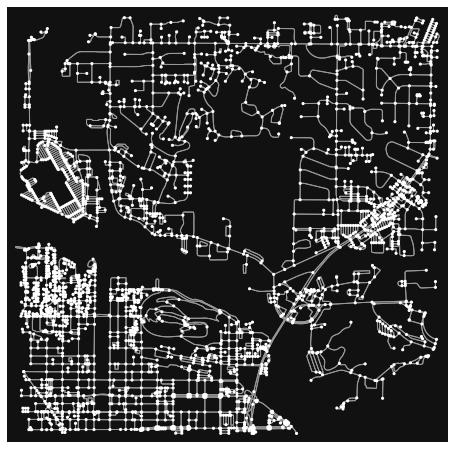

In [23]:
# Define coordinates of home
lat_lon = (44.065017, -123.088889)

# Import walkable street network data around Condon Hall
g = ox.graph_from_point(lat_lon, dist=1600, network_type='walk')

# Plot map
fig, ax = ox.plot_graph(g, node_size=10)

In [35]:
# Convert to graph
graph_proj = ox.project_graph(g)

# Get edges and nodes separately
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [36]:
# Check projection is UTM Zone 10N
print("Coordinate system:", edges_proj.crs)

# Convert the cafe dataset back to UTM Zone 10N
nearest_pubs = nearest_pubs.to_crs('EPSG:32610')

Coordinate system: +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [37]:
# Get x and y coordinates of Condon Hall
orig_xy = lat_lon

# Get x and y coordinates of one of the cafes (the furthest of the ten)
target_xy = (nearest_pubs['centroid'].y.values[-1], nearest_pubs['centroid'].x.values[-1])

In [38]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.distance.nearest_nodes(G=graph_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [39]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

In [40]:
# Plot the shortest path using folium
m = ox.plot_route_folium(g, route, weight=5)
m

This map shows the walking directions from a home adress in eugene to the nearest pub

Part 3

In [41]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes['geometry'].values))

# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Print length of route
print('Walking distance to %s = %.1f km' % (nearest_pubs['name'].iloc[-1], route_geom['geometry'].length / 1000))

Walking distance to Highlands Pub & Sports Bar = 1.8 km


In [43]:
# Get x and y coordinates of all ten of the nearest cafes
target_xy = (nearest_pubs['centroid'].y.values, nearest_pubs['centroid'].x.values)

In [65]:
routes = []
distances = []
for i in range(len(target_xy[0])):
    
    # Find the node in the graph that is closest to the target point (here, we want to get the node id)
    target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1][i], Y=target_xy[0][i], return_dist=False)
    
    # Calculate the shortest path
    route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
    
    # Append route to list
    routes.append(route)
    
    # Get the nodes along the shortest path
    route_nodes = nodes_proj.loc[route]
    
    # Create a geometry for the shortest path
    route_line = LineString(list(route_nodes['geometry'].values))

    # Create a GeoDataFrame
    route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

    # Print length of route
    print('Walking distance to %s = %.1f km' % (nearest_pubs['name'].iloc[i], route_geom['geometry'].length / 1000))
    
    # Append distances to list
    distances.append(route_geom['geometry'].length[0])

Walking distance to Rennie's Landing = 2.1 km
Walking distance to McMenamins High Street Brewery & Café = 1.6 km
Walking distance to Good Times Cafe & Bar = 1.9 km
Walking distance to Falling Sky Brewing House = 1.2 km
Walking distance to The Bier Stein Bottle Shop & Pub = 1.2 km
Walking distance to McMenimin's North Bank = 3.0 km
Walking distance to Side Pocket Tavern = 0.4 km
Walking distance to Oakshire Public House = 1.1 km
Walking distance to Wetlands Brew Pub Sports Bar = 0.3 km
Walking distance to Highlands Pub & Sports Bar = 1.8 km


In [66]:
nearest_pubs['network_distance'] = distances
nearest_pubs

,name,euclidean_distance,centroid,network_distance,Difference
1,Rennie's Landing,149.964559,POINT (493677.674 4877029.023),2113.689544,1963.724985
7,McMenamins High Street Brewery & Café,782.774868,POINT (492957.055 4877001.136),1579.361360,796.586492
3,Good Times Cafe & Bar,1100.447674,POINT (493013.082 4877722.501),1853.551372,753.103698
4,Falling Sky Brewing House,1118.131743,POINT (492613.684 4876898.214),1217.223815,99.092072
0,The Bier Stein Bottle Shop & Pub,1168.680602,POINT (492602.803 4876587.121),1217.223815,48.543212
6,McMenimin's North Bank,1692.568474,POINT (493197.860 4878495.309),2995.385146,1302.816672
8,Side Pocket Tavern,2371.853771,POINT (491529.610 4877770.147),445.683177,-1926.170594
5,Oakshire Public House,2398.499148,POINT (491755.907 4878248.838),1093.354413,-1305.144735
9,Wetlands Brew Pub Sports Bar,3644.608030,POINT (490122.910 4877398.305),327.910372,-3316.697658
11,Highlands Pub & Sports Bar,3921.254535,POINT (492985.283 4873039.616),1756.254062,-2165.000473


In [70]:
nearest_pubs['Difference'] = nearest_pubs['euclidean_distance'] - nearest_pubs['network_distance']
nearest_pubs.describe()

,euclidean_distance,network_distance,Difference
count,10.000000,10.000000,10.000000
mean,1834.878340,1459.963708,374.914633
std,1233.654912,789.119687,1714.742433
min,149.964559,327.910372,-1963.724985
25%,1104.868691,1124.321763,-785.715794
50%,1430.624538,1398.292587,-73.817642
75%,2391.837804,1829.227045,1770.914129
max,3921.254535,2995.385146,3316.697658


Question 3
a) the average difference between the two distances is 374 meters.
b) you would not want to use a euclidean distance in a dense urban area, where walking a straight line would be impossible. I would also not be advisable for crossing long spans of terrain where there might be obstacles like water in the way. 